# Decision Tree Fitting Starter

An example of loading data, manually specifying a decision tree, predicting values for new features, and visualizing the resulting decision tree.

See below for project description.


* Class name: CS 460g
* Assignment: Homework #1 
* Student Name: [ADD YOUR NAME HERE]
* Student Number: [ADD YOUR ID NUMBER HERE]

In [6]:
import numpy as np
import copy
import pandas as pd
import matplotlib.pyplot as plt

In [112]:
def tree_predict(tree,feat_test):

  # predict the label and compute the score for each row in feat_test for a given tree
  sco = np.empty((feat_test.shape[0],1))
  sco.fill(np.nan) # good practice to use NaNs to initialize

  # compute P(true|feat) at the leaf node for each test case
  for i, feat_cur in enumerate(feat_test):

    # run the current example down the tree
    node = tree
    while True:      
      if 'left' in node:
        # at a split node
        if feat_cur[node['dimension']] < node['threshold']:
          node = node['left']
        else:
          node = node['right']
      else:
        # at a leaf node
        sco[i] = node['freq'][1] / np.sum(node['freq']);
        break

  label_pred = .5 <= sco;
  
  return label_pred, sco


# Here are some examples of handcoded decision trees, you 
# will need to build decision trees below by looking at the data

fake_test_data = np.array([[1,2,3],[2,2,2]],dtype=np.float32)

#print("simple depth-0 decision tree")
tree0 = {}
tree0['freq'] = np.array([1,2],dtype=np.float32)
label, sco = tree_predict(tree0,fake_test_data)
print(label)
print(sco)

#print("simple depth-1 decision tree")
tree1_left = {}
tree1_left['freq'] = np.array([1,2],dtype=np.float32)
tree1_right = {}
tree1_right['freq'] = np.array([2,1],dtype=np.float32)
tree1 = {}
tree1['left'] = tree1_left
tree1['right'] = tree1_right
tree1['dimension'] = 0
tree1['threshold'] = 1.5
label, sco = tree_predict(tree1,fake_test_data)
#print(label)
#print(sco)

[[ True]
 [ True]]
[[0.66666669]
 [0.66666669]]


# Make Data

In [2]:
def gen_from_mean_and_cov(means, covs, labels, mode='train', count=100):
  
  np.random.seed(0) if mode == 'train' else np.random.seed(1)
      
  vals = np.array([]).reshape(0,len(means[0])+1)

  for i, (mean,cov,label) in enumerate(zip(means,covs,labels)):
    vals_new = np.random.multivariate_normal(mean,cov,count);
    vals_new = np.hstack([vals_new,np.ones((vals_new.shape[0],1))*label])
    vals = np.vstack([vals,vals_new])    

  df = pd.DataFrame(data=vals,columns=['x1','x2','y'])

  return df

# There are 6 different simple training datasets

datasets = {
    'train1':gen_from_mean_and_cov([[10,1],[0,4]],[[[2, 0],[0, 2]],[[2, 0],[0, 2]]],[1,0]),
    'train2':gen_from_mean_and_cov([[10,1],[0,4]],[[[2, 0],[0, 2]],[[2, 0],[0, 2]]],[0,1]),
    'train3':gen_from_mean_and_cov([[0,1],[0,3.5]],[[[1, .8],[.8, 1]],[[1, .8],[.8, 1]]],[1,0]),
    'train4':gen_from_mean_and_cov([[1,0],[3,1]],[[[1, .8],[.8, 1]],[[1, .9],[.9, 1]]],[1,0]),
    'train5':gen_from_mean_and_cov([[0,0],[4,0],[-4,0],[0,4],[0,-4]],[[[1, 0],[0, 1]],[[1, 0],[0, 1]],[[1, 0],[0, 1]],[[1, 0],[0, 1]],[[1, 0],[0, 1]]],[1,0,0,0,0]),
    'train6':gen_from_mean_and_cov(
    [[0,0],[4,0],[-4,0],[0,4],[0,-4],[-4,4],[4,4],[4,-4],[-4,-4]],
    [[[1, 0],[0, 1]],[[1, 0],[0, 1]],[[1, 0],[0, 1]],[[1, 0],[0, 1]],[[1, 0],[0, 1]],[[1, 0],[0, 1]],[[1, 0],[0, 1]],[[1, 0],[0, 1]],[[1, 0],[0, 1]]],
    [1,0,0,0,0,1,1,1,1]),
    'test1':gen_from_mean_and_cov([[10,1],[0,4]],[[[2, 0],[0, 2]],[[2, 0],[0, 2]]],[1,0],mode='test'),
    'test2':gen_from_mean_and_cov([[10,1],[0,4]],[[[2, 0],[0, 2]],[[2, 0],[0, 2]]],[0,1],mode='test'),
    'test3':gen_from_mean_and_cov([[0,1],[0,3.5]],[[[1, .8],[.8, 1]],[[1, .8],[.8, 1]]],[1,0],mode='test'),
    'test4':gen_from_mean_and_cov([[1,0],[3,1]],[[[1, .8],[.8, 1]],[[1, .9],[.9, 1]]],[1,0],mode='test'),
    'test5':gen_from_mean_and_cov([[0,0],[4,0],[-4,0],[0,4],[0,-4]],[[[1, 0],[0, 1]],[[1, 0],[0, 1]],[[1, 0],[0, 1]],[[1, 0],[0, 1]],[[1, 0],[0, 1]]],[1,0,0,0,0],mode='test'),
    'test6':gen_from_mean_and_cov(
    [[0,0],[4,0],[-4,0],[0,4],[0,-4],[-4,4],[4,4],[4,-4],[-4,-4]],
    [[[1, 0],[0, 1]],[[1, 0],[0, 1]],[[1, 0],[0, 1]],[[1, 0],[0, 1]],[[1, 0],[0, 1]],[[1, 0],[0, 1]],[[1, 0],[0, 1]],[[1, 0],[0, 1]],[[1, 0],[0, 1]]],
    [1,0,0,0,0,1,1,1,1],mode='test')
}

#df = datasets['train1']

# if you want to write out the CSV and re-read it
# df.to_csv('tmp.csv')
# df = pd.read_csv('tmp.csv')


# Visualize Data


[nan  1.  2.  0.] [0. 1. 0. 0.]
0
1
2
3
range(0, 4)


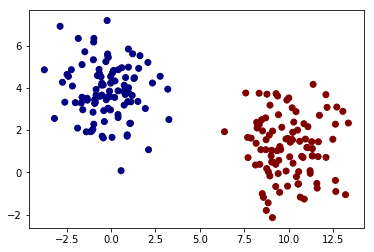

In [11]:
#df = datasets['train3']
plt.scatter(df.x1,df.x2,c=df.y,cmap=plt.get_cmap('jet'));

x = np.array([[np.NaN,1,2,0],[0,1,0,0]])
t = x.shape[1]
y = np.count_nonzero(~np.isnan(x[0]))
print(x[0],x[1])
g = range(0,4)
for i in g:
    print(i)
print(g)

# Fit Decision Tree

In [18]:
#
# TODO write a function (or functions) to automatically construct a decision 
#      tree, store the result as the variable "tree"
#
# Requirements:
#   - Must be written in Python 3 using standard libraries.
#   - You may only use binary splits
#   - To determine a set of valid splits, sort each attribute separately and
#     compute the midpoint between consecutive values.
#   - You must use Gini or InfoGain as the node impurity measure.
#   - It only needs to work for binary binary labels {0,1}
#   - You can only use basic Python and Numpy functions to build the tree.  You 
#     may not use a pre-existing higher-level library for decision tree fitting.
#     However, you may find it useful to do that to compare how your algorithm
#     is working.
#
#   - Train a decision tree for all 6 datasets defined above: train1, train2,
#     train3, train4, train5, and train6.
#
#   - Compute the percent correct of predictions made by your decision tree on
#     the training set and the corresponding test set (don't merge the two
#     datasets, compute percent correct separately for each).  Include both
#     numbers, for each dataset, in a single table (for a total of 12 numbers).
#
# Source code:
#
#  - Submit all source code.  You may convert this into a set of Python scripts 
#    or write all code in an iPython notebook.
#
# Writeup:
#
#  - Submit a Word document or PDF (all other formats will not be graded!).
#  - Include your name, student number, class name, and "Homework #1".
#  - It must:
#    - Include the classifier visualization below for each dataset (overlay the
#      test set points)
#    - Include a description of any unique aspects of your solution.
#    - Include instructions for how to run your solution.
#
# Graduate Student Extra Work (Small Bonus for Undergraduates):
#
#  Choose one of the following:
#
#  - Implement Gini, InfoGain, and Misclassification error split criteria.
#    Compare the accuracy on the training set.  Which one is better?  Why?
#
#  - Implement the ability to limit the maximum depth of the decision tree.
#    What is the optimal depth for each dataset?  Why did you pick this value?
#

def tree_train(tree,data_train,freq,k):
    
    #! Initiate parameters
    best_score = np.NaN
    this_node_data = {}
    node = copy.deepcopy(tree)
    
    #! Loop through each feature
    for i, curr_feat in enumerate(data_train):
        if (not curr_feat == 'y'): # This value acts as an identifier
            
            #! Loop through each possible threshold in the data set at the current feature
            for j in range(1,data_train.shape[0]):
                
                #! Reset all the values in "node"
                node['left']['freq'].fill(0)
                node['left']['label'].fill(0)
                node['left']['x1'].fill(0)
                node['left']['x2'].fill(0)
                node['right']['freq'].fill(0)
                node['right']['label'].fill(0)
                node['right']['x1'].fill(0)
                node['right']['x2'].fill(0)
                score = np.empty(2)
                score.fill(np.NaN)
                
                #! Compute the threshold at the current datum in the current feature
                curr_thresh = (data_train[curr_feat][j-1] + data_train[curr_feat][j])/2
                
                #! Determine which data belongs in the child node at current threshold
                for h, curr_datum in enumerate(data_train[curr_feat]):
                    if (curr_datum < curr_thresh and freq[h] == 1):
                        node['left']['freq'][h] = node['left']['freq'][h] + 1
                        node['left']['label'][h] = node['left']['label'][h] + data_train['y'][h]
                        node['left']['x1'][h] = data_train['x1'][h]
                        node['left']['x2'][h] = data_train['x2'][h]
                    elif (curr_datum >= curr_thresh and freq[h] == 1):
                        node['right']['freq'][h] = node['right']['freq'][h] + 1
                        node['right']['label'][h] = node['right']['label'][h] + data_train['y'][h]
                        node['right']['x1'][h] = data_train['x1'][h]
                        node['right']['x2'][h] = data_train['x2'][h]
                
                #! Compute the probabilities and GINI score of Left child node
                prob_left_1 = np.count_nonzero(node['left']['label'])/np.count_nonzero(node['left']['freq'])
                prob_left_0 = 1 - prob_left_1
                if prob_left_1 < 0.5:
                    node['left']['leaf_label'] = 0
                    score[0] = 1 - np.power(prob_left_1,2) - np.power(prob_left_0,2)
                else:
                    node['left']['leaf_label'] = 1
                    score[0] = 1 - np.power(prob_left_1,2) - np.power(prob_left_0,2)
                    
                #! Compute the probabilities and GINI score of Right child node
                prob_right_1 = np.count_nonzero(node['right']['label'])/np.count_nonzero(node['right']['freq'])
                prob_right_0 = 1 - prob_right_1
                if prob_right_1 < 0.5:
                    node['right']['leaf_label'] = 0
                    score[1] = 1 - np.power(prob_right_1,2) - np.power(prob_right_0,2)
                else:
                    node['right']['leaf_label'] = 1
                    score[1] = 1 - np.power(prob_right_1,2) - np.power(prob_right_0,2)
                    
                #! Compare this node threshold with the "best" score computed for this training data
                #!             NOTE: Will only update if the GINI score is better at this node than 
                #!                   previous nodes
                if (not best_score < score[0]+score[1]):
                    best_score = score[0] + score[1]
                    des_thresh = curr_thresh
                    thresh_feature = curr_feat
                    index = j
                    this_node_data['left'] = copy.deepcopy(node['left'])
                    this_node_data['right'] = copy.deepcopy(node['right'])
    
    #! Update the outputs of the running_tree_train() function
    this_node = {}
    this_node['score'] = best_score
    this_node['threshold'] = des_thresh
    this_node['thresh_feature'] = thresh_feature
    this_node['left'] = {}
    this_node['right'] = {}
    this_node['label'] = {}
    #this_node['index'] = index
    
    #! Tree depth ---> remaining recursions
    if k != 1:
        k = k-1
        this_node['left'] = tree_train(tree,this_node_data['left'],this_node_data['left']['freq'],k)
        this_node['right'] = tree_train(tree,this_node_data['right'],this_node_data['right']['freq'],k)
    else:
        k = k-1
        #this_node['label'] = this_node_data['leaf_label']
        print('This tree is done running!!!')
    
    return this_node


#! Prescribe tree depth and dataset
tree_depth = 2
df = datasets['train1']

#! This is similar to your template
treez_left = {}
treez_left['freq'] = np.zeros((df.shape[0]))
treez_left['label'] = np.zeros((df.shape[0]))
treez_left['x1'] = np.zeros((df.shape[0]))
treez_left['x2'] = np.zeros((df.shape[0]))
treez_left['leaf_label'] = np.NaN
treez_right = {}
treez_right['freq'] = np.zeros((df.shape[0]))
treez_right['label'] = np.zeros((df.shape[0]))
treez_right['x1'] = np.zeros((df.shape[0]))
treez_right['x2'] = np.zeros((df.shape[0]))
treez_right['leaf_label'] = np.NaN
freq = np.ones(df.shape[0])

#! Construct default tree archetecture
tree = {}
tree['left'] = treez_left
tree['right'] = treez_right
tree['leaf_label'] = np.NaN
big_tree = {}

#! First pass through the training tree
trained_tree = tree_train(tree,df,freq,tree_depth)

#print(type(tree))

#print(node_data)        

#print(node_params)

#print(tree)

AttributeError: 'dict' object has no attribute 'shape'

In [17]:
print(trained_tree)

{'score': 0.0, 'threshold': 6.26858782794288, 'thresh_feature': 'x1', 'left': {}, 'right': {}, 'label': {}}


# Visualize Classifier

For a range of values in feature space show the score, decision, decision boundary, and samples.

In [113]:
def vis2d_classifier(tree,data):
  
  # create the domain for the plot
  x1_min = data.x1.min()
  x1_max = data.x1.max()
  x2_min = data.x2.min()
  x2_max = data.x2.max()

  x1 = np.linspace(x1_min, x1_max, 200)
  x2 = np.linspace(x2_min, x2_max, 200)
  X1,X2 = np.meshgrid(x1, x2)

  # convert it into a matrix (rows are locations, columns are features)
  vis_data = np.hstack([X1.reshape(-1,1),X2.reshape(-1,1)])

  # classify each location
  vis_class, vis_sco = tree_predict(tree,vis_data)

  # convert back into image shapes
  vis_class = vis_class.reshape(X1.shape)
  vis_sco = vis_sco.reshape(X1.shape)

  #
  # Make the plots
  #

  # show the function value in the background
  cs = plt.imshow(vis_sco,
    extent=(x1_min,x1_max,x2_max,x2_min), # define limits of grid, note reversed y axis
    cmap=plt.cm.jet, vmin=0.,vmax=1.)
  plt.clim(0,1) # defines the value to assign the min/max color

  # draw the line on top
  levels = np.array([.5])
  cs_line = plt.contour(X1,X2,vis_sco,levels, colors='k')

  plt.scatter(data.x1,data.x2,c=data.y,edgecolors='w',cmap=plt.get_cmap('jet'))

  # add a color bar
  CB = plt.colorbar(cs)

  plt.show()
  
vis2d_classifier(tree,df)

IndexError: index 10 is out of bounds for axis 0 with size 2